# "Dining Data": An EDA and Machine Learning Project on Restaurant Bills and Tips

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import streamlit as st
from streamlit_jupyter import StreamlitPatcher, tqdm
StreamlitPatcher().jupyter()

## Load the data

In [2]:
df = pd.read_csv("data/tips.csv")

## Explanatory Data Analysis

In [3]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
#
df.shape

(244, 7)

In [7]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Five questions to answer about the dataset
1. What is the percentage of customers who smoke?

In [9]:
# Calculate percentage of smokers
num_smokers = df['smoker'].value_counts()['Yes']
total_customers = df['smoker'].count()
percent_smokers = num_smokers / total_customers * 100

print(f"{percent_smokers:.2f}% of customers are smokers")

38.11% of customers are smokers


2. What is the distribution of total bill amounts?

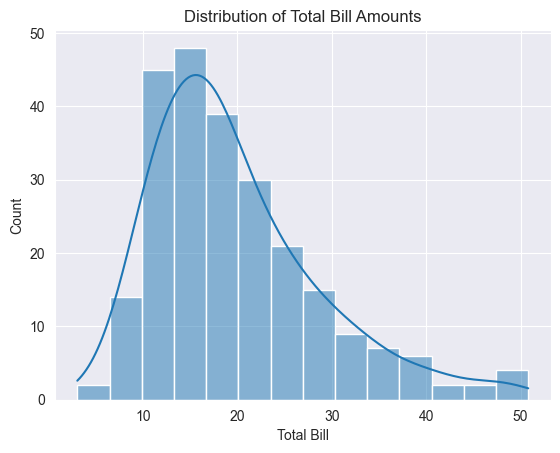

In [10]:
# Create histogram of total bill amounts
sns.histplot(data=df, x='total_bill', kde='density')
plt.xlabel('Total Bill')
plt.title('Distribution of Total Bill Amounts')
plt.savefig("Distribution of Total Bill Amounts.jpg")
plt.show()

3. In which size the tips are usually more?

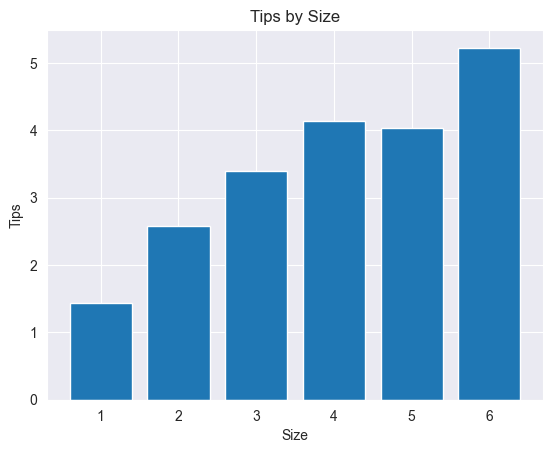

In [11]:
# Group total bill by size
total_by_day = df.groupby('size')['tip'].mean()

# Create bar chart of total bill by size
plt.bar(total_by_day.index, total_by_day.values)
plt.xlabel('Size')
plt.ylabel('Tips')

plt.title('Tips by Size')

plt.show()

4. Are there any outliers in the data for total bill?

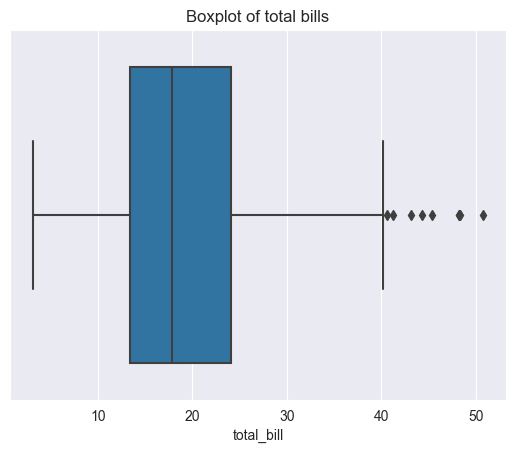

In [12]:
# make the boxplot to check for the outliers
sns.boxplot(x='total_bill', data=df)
plt.title("Boxplot of total bills")
plt.savefig("Boxplot of total bills.jpg")
plt.show()


In [13]:
# Remove Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

5. Is there a difference in the average tip amount between smokers and non-smokers? How about between males and females?

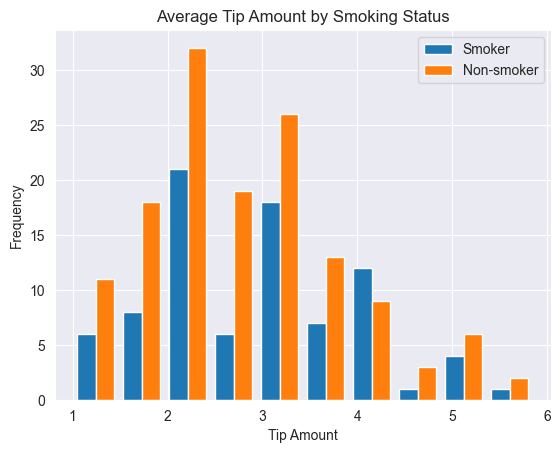

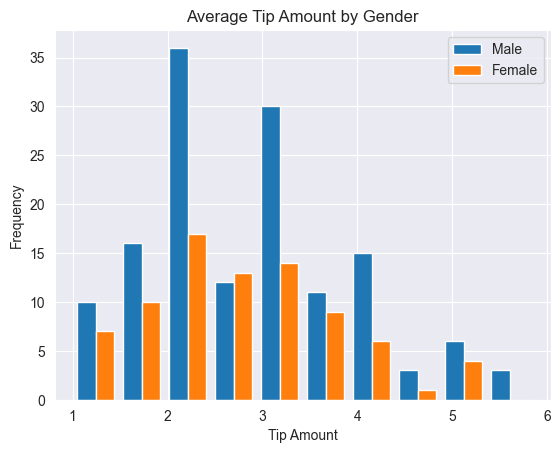

In [14]:
# Create a new DataFrame with the average tip amount for each group
smoker_tip_df = df.groupby('smoker').mean()['tip']
sex_tip_df = df.groupby('sex').mean()['tip']

# Create a histogram of the average tip amount for smokers and non-smokers
plt.hist([df[df['smoker'] == 'Yes']['tip'], df[df['smoker'] == 'No']['tip']],
         label=['Smoker', 'Non-smoker'])
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.title('Average Tip Amount by Smoking Status')
plt.legend()
plt.savefig("Avg_smoker_tip.jpg")
plt.show()

# Create a histogram of the average tip amount for males and females
plt.hist([df[df['sex'] == 'Male']['tip'], df[df['sex'] == 'Female']['tip']],
         label=['Male', 'Female'])
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.title('Average Tip Amount by Gender')

plt.legend()
plt.savefig('Avg_gender_tip.jpg')
plt.show()

In [15]:
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [16]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Tips EDA",
html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Predictive Modeling

In [17]:
# Convert categorical variables to numerical
df["sex"] = df["sex"].apply(lambda sex: 1 if sex == "Male" else 0)
df["smoker"] = df["smoker"].apply(lambda smoker: 1 if smoker == "Yes" else 0)


In [18]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df[["total_bill", "sex","smoker", "size"]])
y = df["tip"]

In [19]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# train a random forest regressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)


RandomForestRegressor()

In [21]:
# make predictions on the test set
y_rf_pred = clf.predict(X_test)

# Evaluate model using mean squared error
mse = mean_squared_error(y_test, y_rf_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.7080330837777785


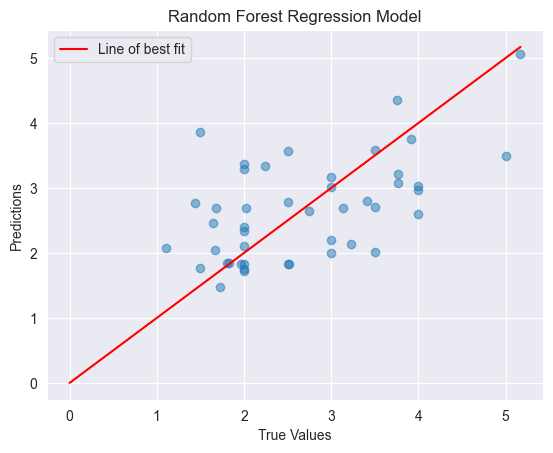

In [22]:
# create a scatter plot
plt.scatter(y_test, y_rf_pred, alpha=0.5)

# calculate line of best fit
x = np.linspace(0, np.max(y_test), 100)
y = x
plt.plot(x, y, '-r', label='Line of best fit')

# set axis labels and title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression Model')

# add legend
plt.legend()

# show the plot
plt.show()

In [23]:
# train the linear regressor
linear_clf = LinearRegression()
linear_clf.fit(X_train,y_train)

LinearRegression()

In [24]:
# make predictions on the test set
y_linear_pred = linear_clf.predict(X_test)

# Evaluate model using mean squared error
mse = mean_squared_error(y_test, y_linear_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.5485587332530406


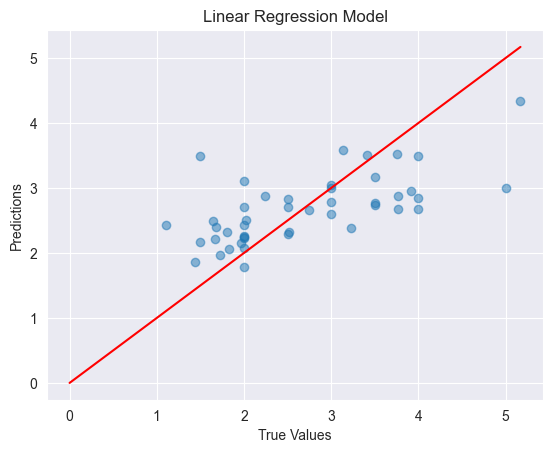

In [25]:
# create a scatter plot
plt.scatter(y_test, y_linear_pred, alpha=0.5)

# calculate line of best fit
x = np.linspace(0, np.max(y_test), 100)
y = x
plt.plot(x, y, '-r', label='Line of best fit')

# set axis labels and title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model')

# save figure
plt.savefig("Linear Prediction Fit.jpg")

# show the plot
plt.show()

In [26]:
for i in range(len(y_linear_pred)):
    print(f"Predicted: {y_linear_pred[i]}  Actual: {y_test.tolist()[i]}")


Predicted: 2.384070720769329  Actual: 3.23
Predicted: 2.67554975880524  Actual: 4.0
Predicted: 2.4062956650037717  Actual: 1.68
Predicted: 2.6626444337838007  Actual: 2.74
Predicted: 3.101529870238273  Actual: 2.0
Predicted: 2.1756108263296365  Actual: 1.5
Predicted: 2.7823066564473904  Actual: 3.0
Predicted: 2.672218569799115  Actual: 3.76
Predicted: 2.502748646387359  Actual: 2.02
Predicted: 2.4317002984503104  Actual: 2.0
Predicted: 3.4880992947427663  Actual: 1.5
Predicted: 2.950372851810527  Actual: 3.92
Predicted: 1.8581635737022306  Actual: 1.44
Predicted: 2.266646308303433  Actual: 2.0
Predicted: 2.825459328835439  Actual: 2.5
Predicted: 3.0045046731600538  Actual: 5.0
Predicted: 3.161650121794678  Actual: 3.5
Predicted: 4.333394569801495  Actual: 5.17
Predicted: 3.0003467516569855  Actual: 3.0
Predicted: 2.2942887519476667  Actual: 2.5
Predicted: 3.4854494031941443  Actual: 4.0
Predicted: 2.7739786839320786  Actual: 3.5
Predicted: 2.055268591106088  Actual: 1.83
Predicted: 1.7